In [11]:
import pandas as pd
url = "https://raw.githubusercontent.com/MicrosoftDocs/ml-basics/master/challenges/data/flights.csv"
df_flight = pd.read_csv(url, sep = ',', header='infer')
df_flight.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


In [12]:
df_flight.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [13]:
df_flight[df_flight.isnull().any(axis = 1)][['DepDelay','DepDel15']]

,DepDelay,DepDel15
171,0,NaN
359,0,NaN
429,0,NaN
545,0,NaN
554,0,NaN
...,...,...
271410,0,NaN
271607,0,NaN
271634,0,NaN
271671,0,NaN


In [14]:
df_flight[df_flight.isnull().any(axis = 1)].DepDelay.describe()

count    2761.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: DepDelay, dtype: float64

In [15]:
df_flight.DepDel15 = df_flight.DepDel15.fillna(0)
df_flight.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

In [16]:
import numpy as np
df_flight[np.logical_and(df_flight.DepDelay > 15, df_flight.DepDel15 == 0 )][['DepDelay','DepDel15']]

,DepDelay,DepDel15


In [17]:
df_flight.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

DepDelay 
Minimum:-63.00
Maximum:1425.00
Mean:10.35
Median:-1.00
Mode:-3.00

ArrDelay 
Minimum:-75.00
Maximum:1440.00
Mean:6.50
Median:-3.00
Mode:0.00



/var/folders/6v/rtpyzjyn32qb24p3xss4scsr0000gn/T/ipykernel_22820/1966653548.py:47: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/6v/rtpyzjyn32qb24p3xss4scsr0000gn/T/ipykernel_22820/1966653548.py:47: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


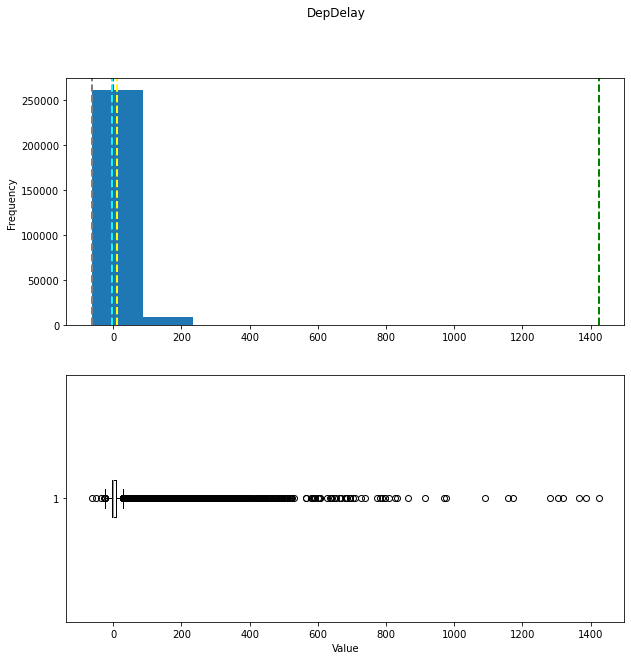

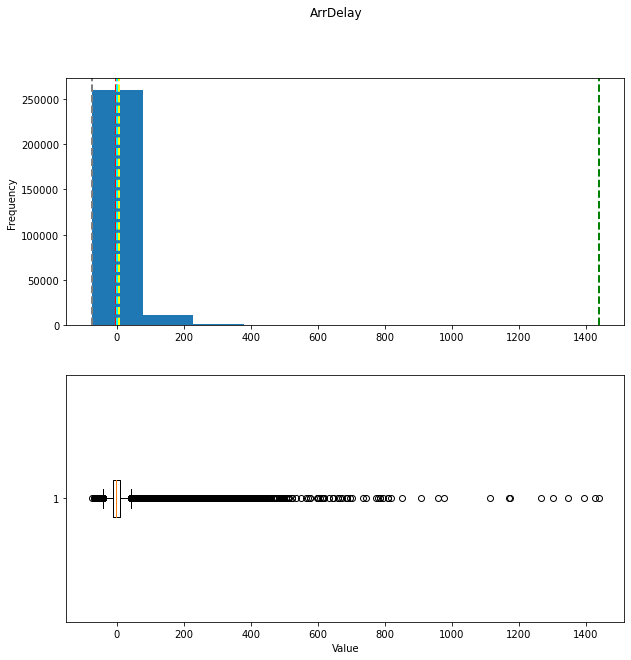

In [8]:
# Function to show summary stats and distribution for a column
# import matplotlib
# matplotlib.use('TkAgg')

def show_col_distribution (col_data):
    from matplotlib import pyplot as plt

    # Get statistics
    
    min_val = col_data.min()
    max_val = col_data.max()
    mean_val = col_data.mean()
    med_val = col_data.median()
    mod_val = col_data.mode()[0]
    
    print(col_data.name,"\nMinimum:{:.2f}\nMaximum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\n".format(min_val,
                                                                                                            max_val,
                                                                                                            mean_val,
                                                                                                            med_val,
                                                                                                            mod_val)
    )
    
    # Create a figure for 2 subplots (2 rows, 1 column)
    
    fig, ax = plt.subplots(2,  1, figsize = (10,10))
    
    ax[0].hist(col_data)
    ax[0].set_ylabel('Frequency')
    
    # Add lines for the mean, median, and mode
    
    ax[0].axvline(min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(max_val, color = 'green', linestyle='dashed', linewidth = 2)
    ax[0].axvline(mean_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(mod_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    
    # Plot the boxplot
    
    ax[1].boxplot(col_data, vert=False)
    ax[1].set_xlabel('Value')
    
    # Add a title to the Figure
    fig.suptitle(col_data.name)
    
    # Show the figure
    fig.show()
    
    
    # Call the function for each delay field
    
    
Target_Fields = ['DepDelay','ArrDelay']

for col in Target_Fields:
    show_col_distribution(df_flight[col])
    
    

In [23]:
# Trim outliers for ArrDelay based on 1% and 90% percentiles

Arr01_pertile = df_flight.ArrDelay.quantile(0.01)
print(Arr10_pertile)
Arr90_pertile = df_flight.ArrDelay.quantile(0.90)
print(Arr90_pertile)

-33.0
38.0


In [27]:
df_flight = df_flight[np.logical_and(df_flight.ArrDelay > Arr01_pertile, \
                                         df_flight.ArrDelay < Arr90_pertile )]

In [29]:
# Trim outliers for DepDelay based on 1% and 90% percentiles

Dep01_pcntile = df_flight.DepDelay.quantile(0.01)
Dep90_pcntile = df_flight.DepDelay.quantile(0.90)

Arr_Dep_01_90_per = df_flight[np.logical_and(df_flight.DepDelay > Dep01_pcntile, \
                                         df_flight.DepDelay < Dep90_pcntile )]

DepDelay 
Minimum:-11.00
Maximum:16.00
Mean:-0.92
Median:-2.00
Mode:-3.00

ArrDelay 
Minimum:-32.00
Maximum:37.00
Mean:-5.03
Median:-6.00
Mode:0.00



/var/folders/6v/rtpyzjyn32qb24p3xss4scsr0000gn/T/ipykernel_22820/1966653548.py:47: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/6v/rtpyzjyn32qb24p3xss4scsr0000gn/T/ipykernel_22820/1966653548.py:47: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


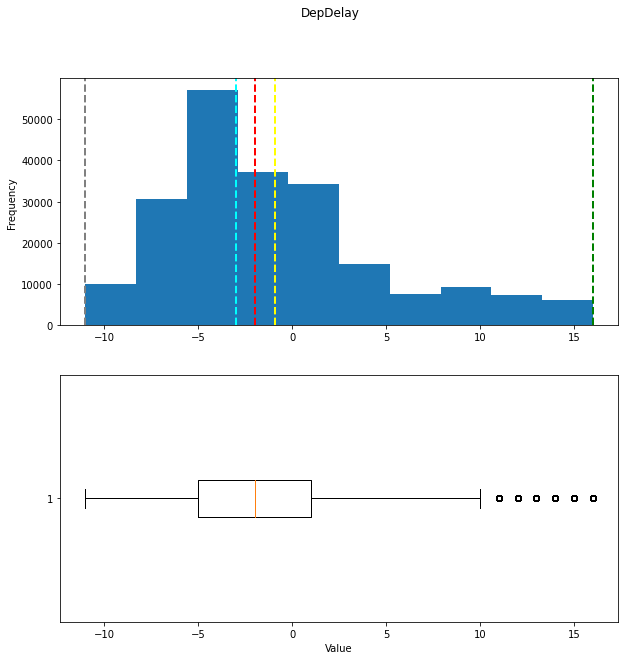

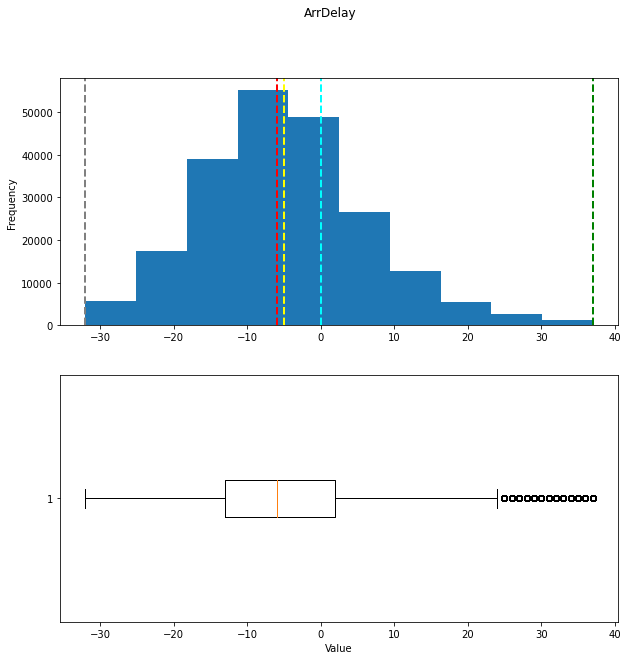

In [30]:
# View the revised distributions
# Already defined Target_Fields = ['DepDelay','ArrDelay']

for col in Target_Fields:
    show_col_distribution(Arr_Dep_01_90_per[col])

